<a href="https://colab.research.google.com/github/FabiolaSepulveda/Challenge-Telecom-X/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
import pandas as pd

# URL del archivo JSON
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

# Extraer los datos
df = pd.read_json(url)

# Ver los primeros datos
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

##Conoce el conjunto de datos

In [2]:
# Desanidar cada columna por separado
customer_data = pd.json_normalize(df['customer'])
phone_data = pd.json_normalize(df['phone'])
internet_data = pd.json_normalize(df['internet'])
account_data = pd.json_normalize(df['account'])

In [3]:
# Ver qué variables tienes en cada una
print("CUSTOMER:", customer_data.columns.tolist())
print("PHONE:", phone_data.columns.tolist())
print("INTERNET:", internet_data.columns.tolist())
print("ACCOUNT:", account_data.columns.tolist())

CUSTOMER: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure']
PHONE: ['PhoneService', 'MultipleLines']
INTERNET: ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
ACCOUNT: ['Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


In [4]:
# Concatenar todo horizontalmente
df2 = pd.concat([
    customer_data.add_prefix('customer_'),
    phone_data.add_prefix('phone_'),
    internet_data.add_prefix('internet_'),
    account_data.add_prefix('account_')
], axis=1)

df2.tail()

,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
7262,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,Male,0,Yes,Yes,63,No,No phone service,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


In [5]:
# Ver estructura general
df2.shape
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_gender            7267 non-null   object 
 1   customer_SeniorCitizen     7267 non-null   int64  
 2   customer_Partner           7267 non-null   object 
 3   customer_Dependents        7267 non-null   object 
 4   customer_tenure            7267 non-null   int64  
 5   phone_PhoneService         7267 non-null   object 
 6   phone_MultipleLines        7267 non-null   object 
 7   internet_InternetService   7267 non-null   object 
 8   internet_OnlineSecurity    7267 non-null   object 
 9   internet_OnlineBackup      7267 non-null   object 
 10  internet_DeviceProtection  7267 non-null   object 
 11  internet_TechSupport       7267 non-null   object 
 12  internet_StreamingTV       7267 non-null   object 
 13  internet_StreamingMovies   7267 non-null   objec

In [6]:
# Quitar los prefijos (customer_, phone_, etc.)
df2.columns = df2.columns.str.replace(r'^(customer_|phone_|internet_|account_)', '', regex=True)

# Ver los nuevos nombres
df2.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

In [7]:
# Agregar las columnas que faltan
df2['customerID'] = df['customerID']
df2['Churn'] = df['Churn']

# Verificar las columnas
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7267 non-null   object 
 1   SeniorCitizen     7267 non-null   int64  
 2   Partner           7267 non-null   object 
 3   Dependents        7267 non-null   object 
 4   tenure            7267 non-null   int64  
 5   PhoneService      7267 non-null   object 
 6   MultipleLines     7267 non-null   object 
 7   InternetService   7267 non-null   object 
 8   OnlineSecurity    7267 non-null   object 
 9   OnlineBackup      7267 non-null   object 
 10  DeviceProtection  7267 non-null   object 
 11  TechSupport       7267 non-null   object 
 12  StreamingTV       7267 non-null   object 
 13  StreamingMovies   7267 non-null   object 
 14  Contract          7267 non-null   object 
 15  PaperlessBilling  7267 non-null   object 
 16  PaymentMethod     7267 non-null   object 


In [8]:
# Ver distribución de la variable objetivo
df2['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [9]:
# Verificar tipos de datos finales
print("VARIABLE OBJETIVO:")
print("- Churn")

print("\nVARIABLES NUMÉRICAS:")
print("- SeniorCitizen: Edad ≥65 años (0=No, 1=Sí)")
print("- tenure: Meses de contrato")
print("- Charges.Monthly: Total servicios por mes")
print("- Charges.Total: Total gastado histórico")

print("\nVARIABLES CATEGÓRICAS:")
print("- Demográficas: gender, Partner, Dependents")
print("- Servicios: PhoneService, MultipleLines, InternetService")
print("- Servicios adicionales: OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport")
print("- Entretenimiento: StreamingTV, StreamingMovies")
print("- Cuenta: Contract, PaperlessBilling, PaymentMethod")

VARIABLE OBJETIVO:
- Churn

VARIABLES NUMÉRICAS:
- SeniorCitizen: Edad ≥65 años (0=No, 1=Sí)
- tenure: Meses de contrato
- Charges.Monthly: Total servicios por mes
- Charges.Total: Total gastado histórico

VARIABLES CATEGÓRICAS:
- Demográficas: gender, Partner, Dependents
- Servicios: PhoneService, MultipleLines, InternetService
- Servicios adicionales: OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport
- Entretenimiento: StreamingTV, StreamingMovies
- Cuenta: Contract, PaperlessBilling, PaymentMethod


In [10]:
print("COLUMNAS MÁS RELEVANTES PARA ANÁLISIS DE EVASIÓN:")

print("\nPRIORIDAD ALTA (Impacto directo en churn):")
print("1. tenure - Meses de contrato (clientes nuevos = mayor riesgo)")
print("2. Contract - Tipo contrato (mes a mes vs anuales)")
print("3. Charges.Monthly - Costo mensual total")
print("4. Charges.Total - Gasto histórico total")

print("\nPRIORIDAD ALTA (Servicios clave):")
print("5. TechSupport - Soporte técnico (satisfacción)")
print("6. OnlineSecurity - Seguridad (valor percibido)")
print("7. InternetService - Tipo internet (DSL vs Fibra)")
print("8. PaymentMethod - Método pago (automático vs manual)")

print("\nPRIORIDAD MEDIA (Perfil cliente):")
print("9. SeniorCitizen - Segmento etario")
print("10. Partner - Estabilidad familiar")
print("11. Dependents - Estabilidad familiar")

print("\nVARIABLE OBJETIVO:")
print("• Churn - Si el cliente dejó la empresa")

COLUMNAS MÁS RELEVANTES PARA ANÁLISIS DE EVASIÓN:

PRIORIDAD ALTA (Impacto directo en churn):
1. tenure - Meses de contrato (clientes nuevos = mayor riesgo)
2. Contract - Tipo contrato (mes a mes vs anuales)
3. Charges.Monthly - Costo mensual total
4. Charges.Total - Gasto histórico total

PRIORIDAD ALTA (Servicios clave):
5. TechSupport - Soporte técnico (satisfacción)
6. OnlineSecurity - Seguridad (valor percibido)
7. InternetService - Tipo internet (DSL vs Fibra)
8. PaymentMethod - Método pago (automático vs manual)

PRIORIDAD MEDIA (Perfil cliente):
9. SeniorCitizen - Segmento etario
10. Partner - Estabilidad familiar
11. Dependents - Estabilidad familiar

VARIABLE OBJETIVO:
• Churn - Si el cliente dejó la empresa


Comprobación de incoherencias en los datos

In [11]:
# Valores nulos
print("\n1. VALORES NULOS:")
nulos = df2.isnull().sum()
print(nulos)


1. VALORES NULOS:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
customerID          0
Churn               0
dtype: int64


In [12]:
# Duplicados
print("\n2. REGISTROS DUPLICADOS:")
duplicados = df2.duplicated().sum()
print(f"Total duplicados: {duplicados}")


2. REGISTROS DUPLICADOS:
Total duplicados: 0


In [13]:
# Verificar customerID únicos
print(f"CustomerIDs únicos: {df2['customerID'].nunique()}")
print(f"Total registros: {len(df2)}")

CustomerIDs únicos: 7267
Total registros: 7267


In [14]:
# Problemas de formato en Charges.Total
print("\n3. PROBLEMAS DE FORMATO:")
print(f"Charges.Total tipo: {df2['Charges.Total'].dtype}")
print("Primeros valores Charges.Total:")
print(df2['Charges.Total'].head())


3. PROBLEMAS DE FORMATO:
Charges.Total tipo: object
Primeros valores Charges.Total:
0      593.3
1      542.4
2     280.85
3    1237.85
4      267.4
Name: Charges.Total, dtype: object


In [15]:
# Inconsistencias en categorías
print("\n4. VALORES ÚNICOS EN VARIABLES CATEGÓRICAS:")
print(f"Churn: {df2['Churn'].unique()}")
print(f"gender: {df2['gender'].unique()}")
print(f"Contract: {df2['Contract'].unique()}")
print(f"InternetService: {df2['InternetService'].unique()}")
print(f"PaymentMethod: {df2['PaymentMethod'].unique()}")


4. VALORES ÚNICOS EN VARIABLES CATEGÓRICAS:
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
Contract: ['One year' 'Month-to-month' 'Two year']
InternetService: ['DSL' 'Fiber optic' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [16]:
# Verificar valores extraños en Churn
print(f"\nDistribución Churn completa:")
print(df2['Churn'].value_counts(dropna=False))


Distribución Churn completa:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


##Manejo de inconsistencias

In [17]:
# 1. Arreglar Charges.Total (convertir a numérico)
print("\n1. CORRIGIENDO CHARGES.TOTAL:")
print(f"Tipo antes: {df2['Charges.Total'].dtype}")
df2['Charges.Total'] = pd.to_numeric(df2['Charges.Total'], errors='coerce')
print(f"Tipo después: {df2['Charges.Total'].dtype}")


1. CORRIGIENDO CHARGES.TOTAL:
Tipo antes: object
Tipo después: float64


In [18]:
# 2. Limpiar variable Churn
print("\n2. LIMPIANDO VARIABLE CHURN:")
print("Valores antes:")
print(df2['Churn'].value_counts(dropna=False))

# Eliminar registros con valores extraños en Churn
df2 = df2[df2['Churn'].isin(['Yes', 'No'])]

print("\nValores después:")
print(df2['Churn'].value_counts())
print(f"Registros eliminados: {7267 - len(df2)}")


2. LIMPIANDO VARIABLE CHURN:
Valores antes:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Valores después:
Churn
No     5174
Yes    1869
Name: count, dtype: int64
Registros eliminados: 224


In [19]:
# 3. Verificar y eliminar valores nulos
print("\n3. VERIFICANDO VALORES NULOS:")
nulos_antes = df2['Charges.Total'].isnull().sum()
print(f"Nulos en Charges.Total: {nulos_antes}")

df2 = df2.dropna(subset=['Charges.Total'])
nulos_despues = df2['Charges.Total'].isnull().sum()
print(f"Nulos eliminados: {nulos_antes - nulos_despues}")


3. VERIFICANDO VALORES NULOS:
Nulos en Charges.Total: 11
Nulos eliminados: 11


In [20]:
# 4. Eliminar duplicados
print("\n4. ELIMINANDO DUPLICADOS:")
duplicados_antes = df2.duplicated().sum()
df2 = df2.drop_duplicates()
print(f"Duplicados eliminados: {duplicados_antes}")

print(f"\n✅ DATASET FINAL LIMPIO:")
print(f"Registros finales: {len(df2)}")
print(f"Columnas: {len(df2.columns)}")


4. ELIMINANDO DUPLICADOS:
Duplicados eliminados: 0

✅ DATASET FINAL LIMPIO:
Registros finales: 7032
Columnas: 21


##Columna de cuentas diarias

In [21]:
print("CREANDO NUEVA VARIABLE: CUENTAS_DIARIAS")

# Calcular facturación diaria a partir de la mensual
df2['Cuentas_Diarias'] = df2['Charges.Monthly'] / 30

print("\n✅ Columna creada exitosamente")
print(f"Total columnas ahora: {len(df2.columns)}")

# Configurar pandas para mostrar todas las columnas completas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Mostrar las primeras filas con todas las columnas
print("\nVista previa del DataFrame con la nueva columna:")
print(df2.head())

CREANDO NUEVA VARIABLE: CUENTAS_DIARIAS

✅ Columna creada exitosamente
Total columnas ahora: 22

Vista previa del DataFrame con la nueva columna:
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes        Yes       9          Yes   
1    Male              0      No         No       9          Yes   
2    Male              0      No         No       4          Yes   
3    Male              1     Yes         No      13          Yes   
4  Female              1     Yes         No       3          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0            No             DSL             No          Yes               No   
1           Yes             DSL             No           No               No   
2            No     Fiber optic             No           No              Yes   
3            No     Fiber optic             No          Yes              Yes   
4            No     Fiber optic             N

In [22]:
print(f"\nEstadísticas de Cuentas_Diarias:")
print(f"Promedio: ${df2['Cuentas_Diarias'].mean():.2f} por día")
print(f"Mínimo: ${df2['Cuentas_Diarias'].min():.2f} por día")
print(f"Máximo: ${df2['Cuentas_Diarias'].max():.2f} por día")


Estadísticas de Cuentas_Diarias:
Promedio: $2.16 por día
Mínimo: $0.61 por día
Máximo: $3.96 por día


PROPÓSITO DE LA NUEVA VARIABLE:

*   **Cuentas_Diarias:** Gasto promedio por día del cliente
*   **Utilidad:** Permite comparar costos en escala diaria más intuitiva
*   **Análisis:** Identificar patrones de gasto que influyen en el churn

##Estandarización y transformación de datos (opcional)

In [23]:
# 1. Convertir variables Yes/No a binario (1/0)
print("\n1. CONVIRTIENDO VARIABLES CATEGÓRICAS A BINARIO:")

columnas_binarias = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in columnas_binarias:
    df2[col] = df2[col].map({'Yes': 1, 'No': 0})

print("✅ Variables Yes/No convertidas a 1/0")

# Configurar pandas para mostrar todas las columnas completas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Mostrar vista previa solo de las columnas que se modificaron
print("\nVista previa de las columnas convertidas:")
print(df2[columnas_binarias].head())



1. CONVIRTIENDO VARIABLES CATEGÓRICAS A BINARIO:
✅ Variables Yes/No convertidas a 1/0

Vista previa de las columnas convertidas:
   Partner  Dependents  PhoneService  PaperlessBilling  OnlineSecurity  \
0        1           1             1                 1             0.0   
1        0           0             1                 0             0.0   
2        0           0             1                 1             0.0   
3        1           0             1                 1             0.0   
4        1           0             1                 1             0.0   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  
0           1.0               0.0          1.0          1.0              0.0  
1           0.0               0.0          0.0          0.0              1.0  
2           0.0               1.0          0.0          0.0              0.0  
3           1.0               1.0          0.0          1.0              1.0  
4           0.0               

In [24]:
# 2. Convertir variable objetivo Churn
print(f"\n2. TRANSFORMANDO VARIABLE OBJETIVO:")

df2['Churn_Binario'] = df2['Churn'].map({'Yes': 1, 'No': 0})

print("✅ Churn: Yes/No → 1/0 (nueva columna Churn_Binario)")

# Configurar pandas para mostrar todas las columnas completas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Mostrar vista previa solo de la columna creada junto con la original
print("\nVista previa de la columna Churn y su versión binaria:")
print(df2[['Churn', 'Churn_Binario']].head())


2. TRANSFORMANDO VARIABLE OBJETIVO:
✅ Churn: Yes/No → 1/0 (nueva columna Churn_Binario)

Vista previa de la columna Churn y su versión binaria:
  Churn  Churn_Binario
0    No              0
1    No              0
2   Yes              1
3   Yes              1
4   Yes              1


In [25]:
# Diccionario de columnas a renombrar
columnas_renombrar = {
    'gender': 'Genero',
    'SeniorCitizen': 'AdultoMayor',
    'Partner': 'TienePareja',
    'Dependents': 'TieneDependientes',
    'tenure': 'Antiguedad_Meses',
    'Contract': 'TipoContrato',
    'Charges.Monthly': 'Cargo_Mensual',
    'Charges.Total': 'Cargo_Total'
}

print(f"\n3. RENOMBRANDO COLUMNAS A ESPAÑOL:")

# Renombrar
df2 = df2.rename(columns=columnas_renombrar)

print("✅ Columnas renombradas correctamente")

# Mostrar solo las columnas que fueron renombradas
print("\nColumnas renombradas:")
for original, nuevo in columnas_renombrar.items():
    print(f" - {original} → {nuevo}")


3. RENOMBRANDO COLUMNAS A ESPAÑOL:
✅ Columnas renombradas correctamente

Columnas renombradas:
 - gender → Genero
 - SeniorCitizen → AdultoMayor
 - Partner → TienePareja
 - Dependents → TieneDependientes
 - tenure → Antiguedad_Meses
 - Contract → TipoContrato
 - Charges.Monthly → Cargo_Mensual
 - Charges.Total → Cargo_Total


In [26]:
print(f"\n✅ TRANSFORMACIÓN COMPLETADA - Total de columnas: {len(df2.columns)}")


✅ TRANSFORMACIÓN COMPLETADA - Total de columnas: 23


#📊 Carga y análisis

##Análisis Descriptivo

In [27]:
# Estadísticas descriptivas generales
print("\n📊 ESTADÍSTICAS DESCRIPTIVAS COMPLETAS:")
df2.describe()


📊 ESTADÍSTICAS DESCRIPTIVAS COMPLETAS:


,AdultoMayor,TienePareja,TieneDependientes,Antiguedad_Meses,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Cargo_Mensual,Cargo_Total,Cuentas_Diarias,Churn_Binario
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.482509,0.298493,32.421786,0.903299,0.365566,0.439949,0.438679,0.370102,0.490385,0.495464,0.592719,64.798208,2283.300441,2.159940,0.265785
std,0.368844,0.499729,0.457629,24.545260,0.295571,0.481632,0.496426,0.496271,0.482875,0.499953,0.500025,0.491363,30.085974,2266.771362,1.002866,0.441782
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,1.186250,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,2.995417,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333,1.000000


In [28]:
# Análisis específico de variables numéricas clave
print("\n🔢 ANÁLISIS DE VARIABLES NUMÉRICAS CLAVE:")

print("\n• ANTIGÜEDAD (Antiguedad_Meses):")
print(f"Promedio: {df2['Antiguedad_Meses'].mean():.1f} meses")
print(f"Mediana: {df2['Antiguedad_Meses'].median():.1f} meses")
print(f"Desviación estándar: {df2['Antiguedad_Meses'].std():.1f} meses")
print(f"Rango: {df2['Antiguedad_Meses'].min()}-{df2['Antiguedad_Meses'].max()} meses")

print("\n• CARGO MENSUAL (Cargo_Mensual):")
print(f"Promedio: ${df2['Cargo_Mensual'].mean():.2f}")
print(f"Mediana: ${df2['Cargo_Mensual'].median():.2f}")
print(f"Desviación estándar: ${df2['Cargo_Mensual'].std():.2f}")
print(f"Rango: ${df2['Cargo_Mensual'].min():.2f}-${df2['Cargo_Mensual'].max():.2f}")

print("\n• CARGO TOTAL (Cargo_Total):")
print(f"Promedio: ${df2['Cargo_Total'].mean():.2f}")
print(f"Mediana: ${df2['Cargo_Total'].median():.2f}")
print(f"Desviación estándar: ${df2['Cargo_Total'].std():.2f}")

print("\n• CUENTAS DIARIAS:")
print(f"Promedio: ${df2['Cuentas_Diarias'].mean():.2f} por día")
print(f"Mediana: ${df2['Cuentas_Diarias'].median():.2f} por día")


🔢 ANÁLISIS DE VARIABLES NUMÉRICAS CLAVE:

• ANTIGÜEDAD (Antiguedad_Meses):
Promedio: 32.4 meses
Mediana: 29.0 meses
Desviación estándar: 24.5 meses
Rango: 1-72 meses

• CARGO MENSUAL (Cargo_Mensual):
Promedio: $64.80
Mediana: $70.35
Desviación estándar: $30.09
Rango: $18.25-$118.75

• CARGO TOTAL (Cargo_Total):
Promedio: $2283.30
Mediana: $1397.47
Desviación estándar: $2266.77

• CUENTAS DIARIAS:
Promedio: $2.16 por día
Mediana: $2.34 por día


In [29]:
# Distribución de variables categóricas clave
print("\n🏷️ DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS:")
print(f"\nDistribución por Género:")
print(df2['Genero'].value_counts())

print(f"\nDistribución por Tipo de Contrato:")
print(df2['TipoContrato'].value_counts())

print(f"\nDistribución de Churn:")
print(df2['Churn'].value_counts())


🏷️ DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS:

Distribución por Género:
Genero
Male      3549
Female    3483
Name: count, dtype: int64

Distribución por Tipo de Contrato:
TipoContrato
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

Distribución de Churn:
Churn
No     5163
Yes    1869
Name: count, dtype: int64


##Distribución de evasión

In [30]:
# Distribución absoluta y porcentual
print("\n📊 DISTRIBUCIÓN DE CHURN:")
churn_counts = df2['Churn'].value_counts()
churn_pct = df2['Churn'].value_counts(normalize=True) * 100

print(f"\nSe quedaron (No): {churn_counts['No']:,} clientes ({churn_pct['No']:.1f}%)")
print(f"Se fueron (Yes): {churn_counts['Yes']:,} clientes ({churn_pct['Yes']:.1f}%)")
print(f"Total clientes: {len(df2):,}")


📊 DISTRIBUCIÓN DE CHURN:

Se quedaron (No): 5,163 clientes (73.4%)
Se fueron (Yes): 1,869 clientes (26.6%)
Total clientes: 7,032


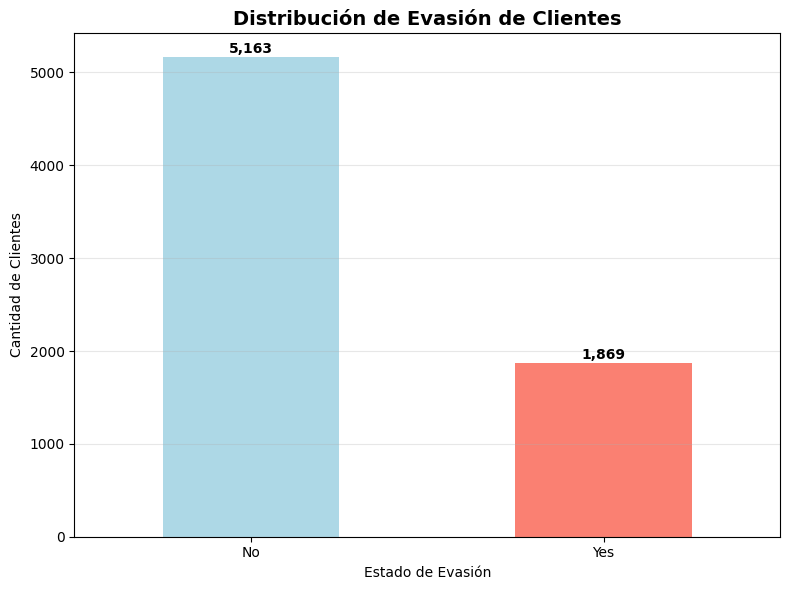

In [31]:
# Visualización con gráfico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Distribución de Evasión de Clientes', fontsize=14, fontweight='bold')
plt.xlabel('Estado de Evasión')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(churn_counts.values):
   plt.text(i, v + 50, f'{v:,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

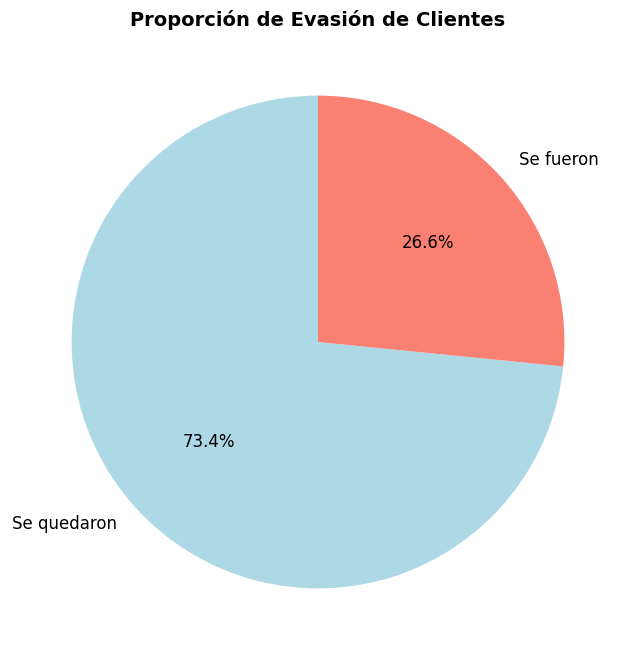


📈 CONCLUSIÓN:
La empresa tiene una tasa de evasión del 26.6%


In [32]:
# Gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(churn_counts.values, labels=['Se quedaron', 'Se fueron'],
       autopct='%1.1f%%', colors=['lightblue', 'salmon'],
       startangle=90, textprops={'fontsize': 12})
plt.title('Proporción de Evasión de Clientes', fontsize=14, fontweight='bold')
plt.show()

print(f"\n📈 CONCLUSIÓN:")
print(f"La empresa tiene una tasa de evasión del {churn_pct['Yes']:.1f}%")

##Recuento de evasión por variables categóricas


👥 EVASIÓN POR GÉNERO:
Churn     No  Yes
Genero           
Female  2544  939
Male    2619  930


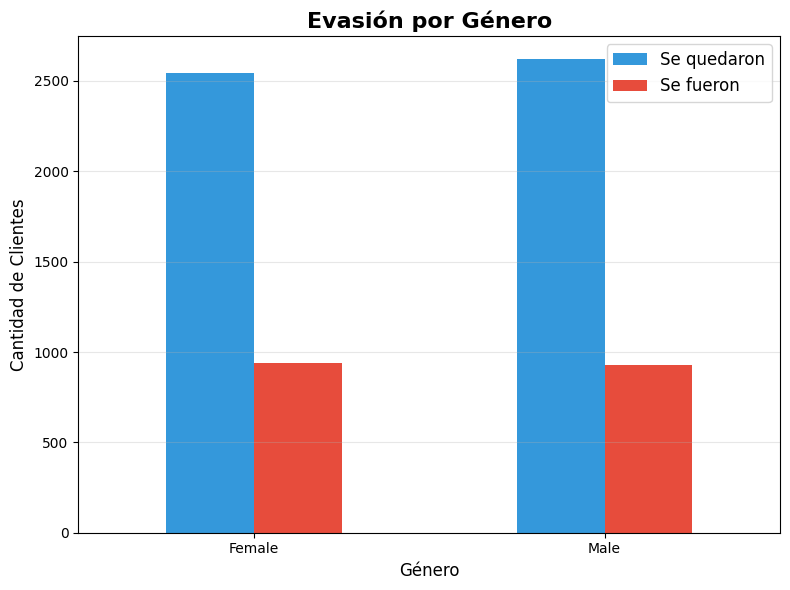

In [36]:
# 1. Churn por Género
print("\n👥 EVASIÓN POR GÉNERO:")
churn_genero = pd.crosstab(df2['Genero'], df2['Churn'])
print(churn_genero)

# Gráfico 1: Evasión por Género
churn_genero.plot(kind='bar', color=['#3498db', '#e74c3c'], figsize=(8, 6))
plt.title('Evasión por Género', fontsize=16, fontweight='bold')
plt.xlabel('Género', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Se quedaron', 'Se fueron'], fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


📋 EVASIÓN POR TIPO DE CONTRATO:
Churn             No   Yes
TipoContrato              
Month-to-month  57.3  42.7
One year        88.7  11.3
Two year        97.2   2.8


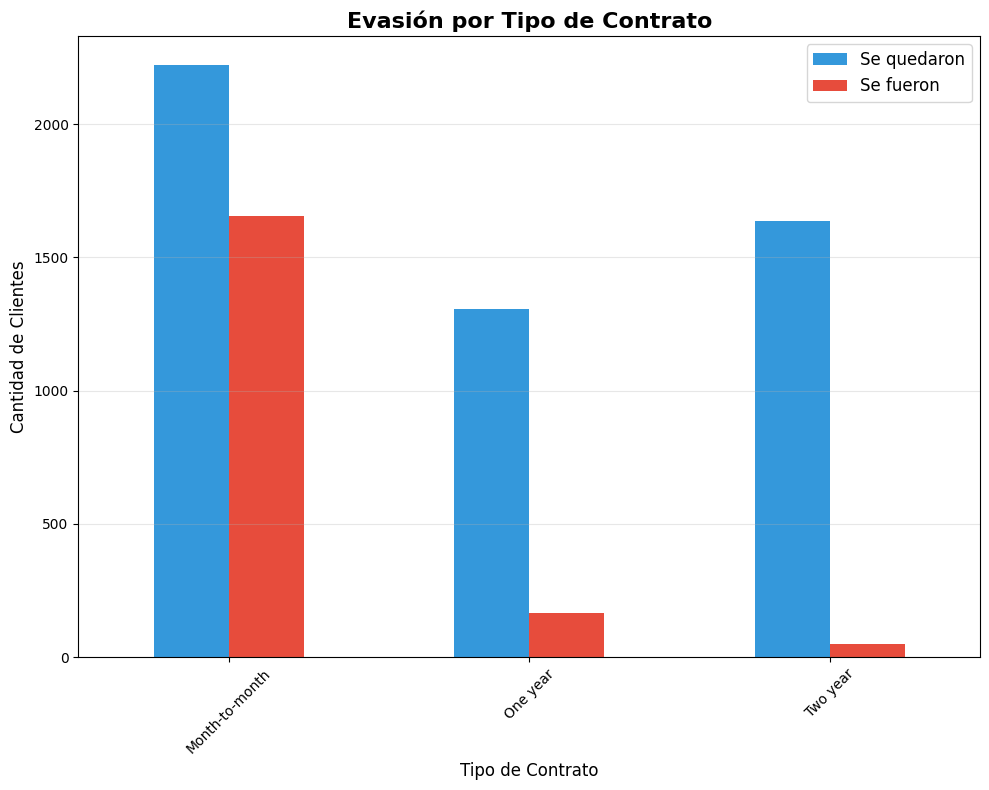

In [37]:
# 2. Churn por Tipo de Contrato
print("\n📋 EVASIÓN POR TIPO DE CONTRATO:")
churn_contrato = pd.crosstab(df2['TipoContrato'], df2['Churn'], normalize='index') * 100
print(churn_contrato.round(1))

# Gráfico 2: Tipo de Contrato
churn_contrato_counts = pd.crosstab(df2['TipoContrato'], df2['Churn'])
churn_contrato_counts.plot(kind='bar', color=['#3498db', '#e74c3c'], figsize=(10, 8))
plt.title('Evasión por Tipo de Contrato', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Se quedaron', 'Se fueron'], fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


💳 EVASIÓN POR MÉTODO DE PAGO:
Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  83.3  16.7
Credit card (automatic)    84.7  15.3
Electronic check           54.7  45.3
Mailed check               80.8  19.2


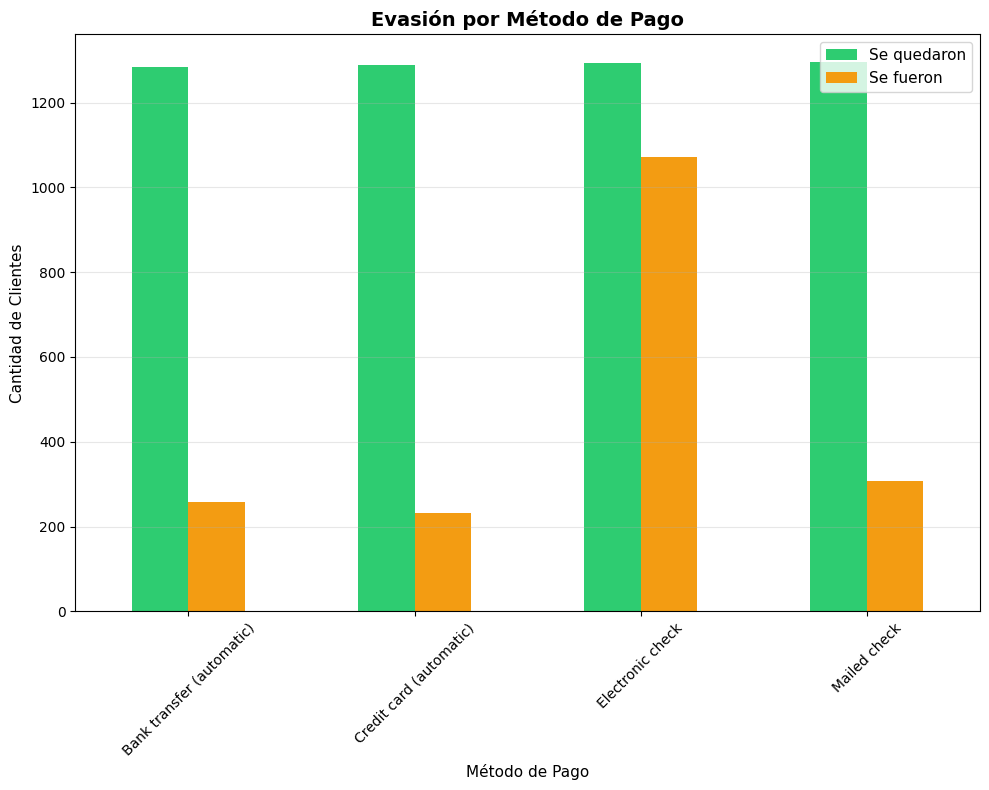

In [38]:
# 3. Churn por Método de Pago
print("\n💳 EVASIÓN POR MÉTODO DE PAGO:")
churn_pago = pd.crosstab(df2['PaymentMethod'], df2['Churn'], normalize='index') * 100
print(churn_pago.round(1))

# Gráfico 3: Método de Pago
churn_pago_counts = pd.crosstab(df2['PaymentMethod'], df2['Churn'])
churn_pago_counts.plot(kind='bar', color=['#2ecc71', '#f39c12'], figsize=(10, 8))
plt.title('Evasión por Método de Pago', fontsize=14, fontweight='bold')
plt.xlabel('Método de Pago', fontsize=11)
plt.ylabel('Cantidad de Clientes', fontsize=11)
plt.xticks(rotation=45)
plt.legend(['Se quedaron', 'Se fueron'], fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


🌐 EVASIÓN POR TIPO DE INTERNET:
Churn              No   Yes
InternetService            
DSL              81.0  19.0
Fiber optic      58.1  41.9
No               92.6   7.4


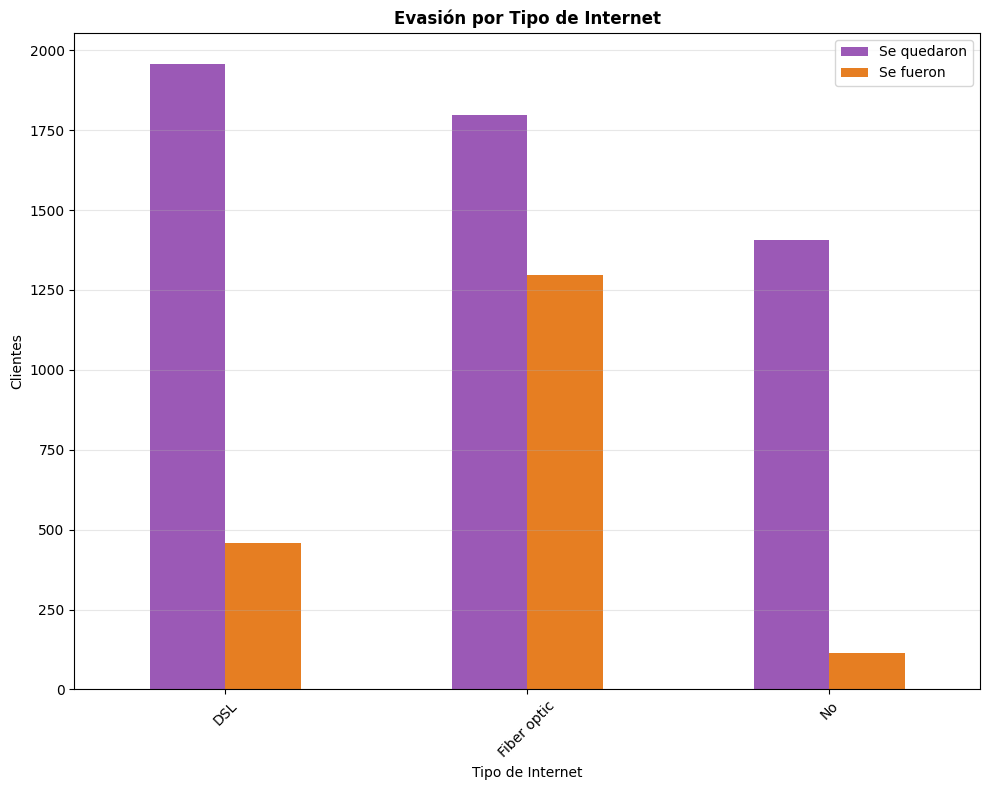

In [39]:
# 4. Churn por Tipo de Internet
print("\n🌐 EVASIÓN POR TIPO DE INTERNET:")
churn_internet = pd.crosstab(df2['InternetService'], df2['Churn'], normalize='index') * 100
print(churn_internet.round(1))

# Gráfico 4: Tipo de Internet
churn_internet_counts = pd.crosstab(df2['InternetService'], df2['Churn'])
churn_internet_counts.plot(kind='bar', color=['#9b59b6', '#e67e22'], figsize=(10, 8))
plt.title('Evasión por Tipo de Internet', fontsize=12, fontweight='bold')
plt.xlabel('Tipo de Internet', fontsize=10)
plt.ylabel('Clientes', fontsize=10)
plt.xticks(rotation=45)
plt.legend(['Se quedaron', 'Se fueron'], fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


🔧 EVASIÓN POR SOPORTE TÉCNICO:
Churn               No   Yes
TechSupport_Text            
Sin Soporte       58.4  41.6
Tiene Soporte     84.8  15.2


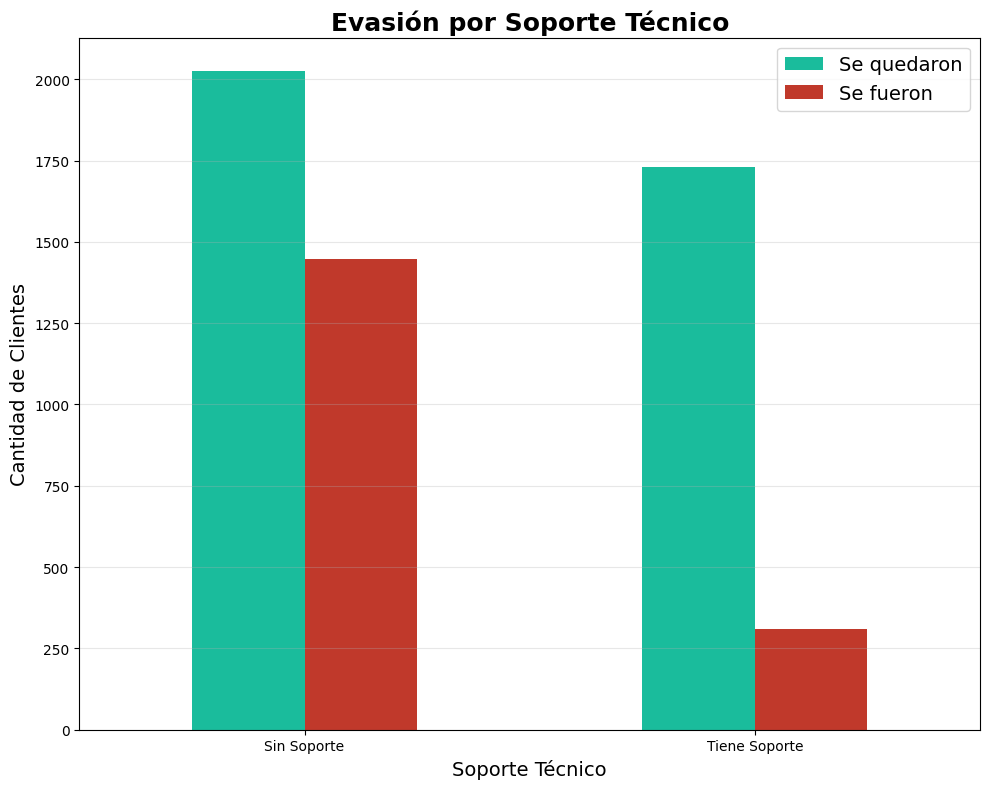



🎯 PATRONES IDENTIFICADOS:
Los análisis revelan diferentes tasas de evasión según el perfil del cliente


In [40]:
# 5. Churn por Soporte Técnico
print("\n🔧 EVASIÓN POR SOPORTE TÉCNICO:")
df2['TechSupport_Text'] = df2['TechSupport'].map({1: 'Tiene Soporte', 0: 'Sin Soporte'})
churn_soporte = pd.crosstab(df2['TechSupport_Text'], df2['Churn'], normalize='index') * 100
print(churn_soporte.round(1))

# Gráfico 5: Soporte Técnico
churn_soporte_counts = pd.crosstab(df2['TechSupport_Text'], df2['Churn'])
churn_soporte_counts.plot(kind='bar', color=['#1abc9c', '#c0392b'], figsize=(10, 8))
plt.title('Evasión por Soporte Técnico', fontsize=18, fontweight='bold')
plt.xlabel('Soporte Técnico', fontsize=14)
plt.ylabel('Cantidad de Clientes', fontsize=14)
plt.xticks(rotation=0)
plt.legend(['Se quedaron', 'Se fueron'], fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


print(f"\n\n🎯 PATRONES IDENTIFICADOS:")
print("Los análisis revelan diferentes tasas de evasión según el perfil del cliente")

##Conteo de evasión por variables numéricas

In [41]:
# 1. Análisis de Antigüedad por Churn
print("\n📅 ANTIGÜEDAD POR ESTADO DE EVASIÓN:")
antiguedad_stats = df2.groupby('Churn')['Antiguedad_Meses'].describe()
print(antiguedad_stats.round(2))


📅 ANTIGÜEDAD POR ESTADO DE EVASIÓN:
        count   mean    std  min   25%   50%   75%   max
Churn                                                   
No     5163.0  37.65  24.08  1.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.98  19.53  1.0   2.0  10.0  29.0  72.0


In [42]:
# 2. Análisis de Cargo Mensual por Churn
print("\n💰 CARGO MENSUAL POR ESTADO DE EVASIÓN:")
cargo_mensual_stats = df2.groupby('Churn')['Cargo_Mensual'].describe()
print(cargo_mensual_stats.round(2))


💰 CARGO MENSUAL POR ESTADO DE EVASIÓN:
        count   mean    std    min    25%    50%    75%     max
Churn                                                          
No     5163.0  61.31  31.09  18.25  25.10  64.45  88.48  118.75
Yes    1869.0  74.44  24.67  18.85  56.15  79.65  94.20  118.35


In [43]:
# 3. Análisis de Cargo Total por Churn
print("\n💳 CARGO TOTAL POR ESTADO DE EVASIÓN:")
cargo_total_stats = df2.groupby('Churn')['Cargo_Total'].describe()
print(cargo_total_stats.round(2))


💳 CARGO TOTAL POR ESTADO DE EVASIÓN:
        count     mean      std    min     25%      50%      75%      max
Churn                                                                    
No     5163.0  2555.34  2329.46  18.80  577.83  1683.60  4264.12  8672.45
Yes    1869.0  1531.80  1890.82  18.85  134.50   703.55  2331.30  8684.80


In [44]:
# 4. Análisis de Cuentas Diarias por Churn
print("\n📊 CUENTAS DIARIAS POR ESTADO DE EVASIÓN:")
cuentas_diarias_stats = df2.groupby('Churn')['Cuentas_Diarias'].describe()
print(cuentas_diarias_stats.round(2))


📊 CUENTAS DIARIAS POR ESTADO DE EVASIÓN:
        count  mean   std   min   25%   50%   75%   max
Churn                                                  
No     5163.0  2.04  1.04  0.61  0.84  2.15  2.95  3.96
Yes    1869.0  2.48  0.82  0.63  1.87  2.66  3.14  3.94


Visualización Conteo de evasión por variables numéricas

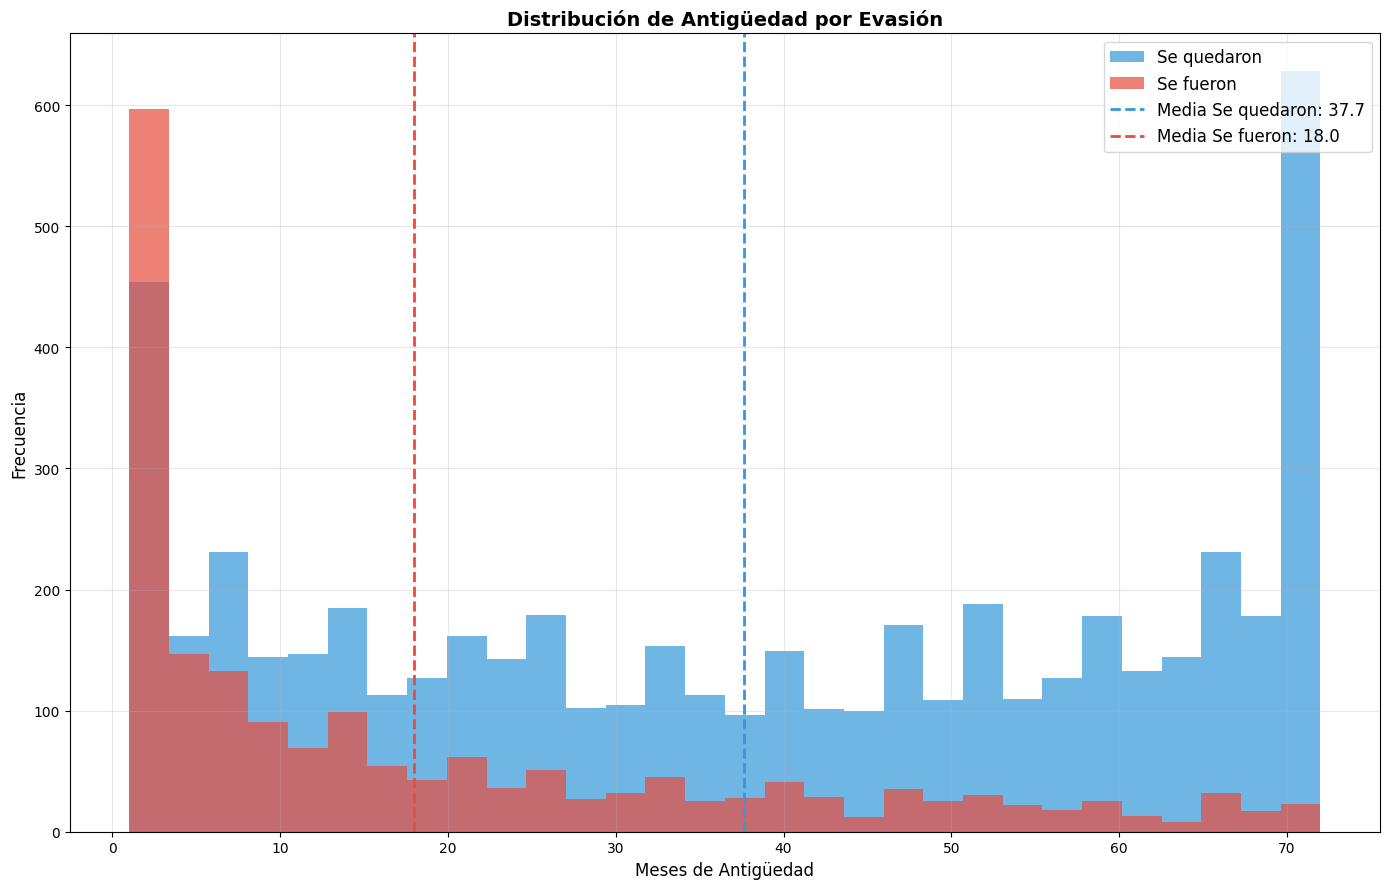

In [45]:
# Gráfico 1: Distribución de Antigüedad
plt.figure(figsize=(14, 9))
df2[df2['Churn']=='No']['Antiguedad_Meses'].hist(bins=30, alpha=0.7, color='#3498db', label='Se quedaron')
df2[df2['Churn']=='Yes']['Antiguedad_Meses'].hist(bins=30, alpha=0.7, color='#e74c3c', label='Se fueron')

plt.title('Distribución de Antigüedad por Evasión', fontsize=14, fontweight='bold')
plt.xlabel('Meses de Antigüedad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Líneas medias
media_no = df2[df2['Churn']=='No']['Antiguedad_Meses'].mean()
media_yes = df2[df2['Churn']=='Yes']['Antiguedad_Meses'].mean()
plt.axvline(media_no, color='#3498db', linestyle='dashed', linewidth=2, label=f'Media Se quedaron: {media_no:.1f}')
plt.axvline(media_yes, color='#e74c3c', linestyle='dashed', linewidth=2, label=f'Media Se fueron: {media_yes:.1f}')

plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

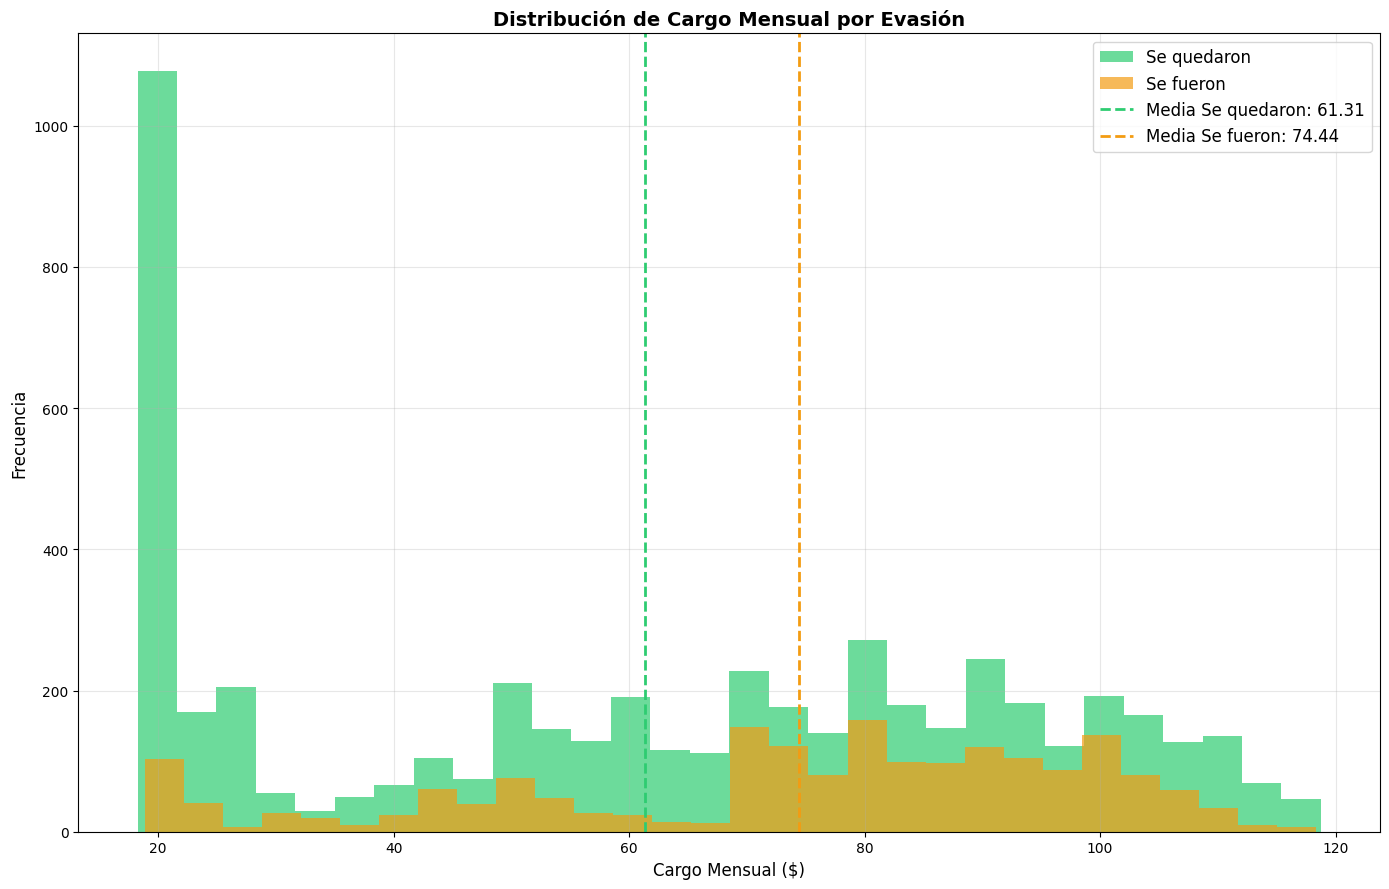

In [46]:
# Gráfico 2: Distribución de Cargo Mensual
plt.figure(figsize=(14, 9))
df2[df2['Churn']=='No']['Cargo_Mensual'].hist(bins=30, alpha=0.7, color='#2ecc71', label='Se quedaron')
df2[df2['Churn']=='Yes']['Cargo_Mensual'].hist(bins=30, alpha=0.7, color='#f39c12', label='Se fueron')

plt.title('Distribución de Cargo Mensual por Evasión', fontsize=14, fontweight='bold')
plt.xlabel('Cargo Mensual ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Líneas medias
media_no = df2[df2['Churn']=='No']['Cargo_Mensual'].mean()
media_yes = df2[df2['Churn']=='Yes']['Cargo_Mensual'].mean()
plt.axvline(media_no, color='#2ecc71', linestyle='dashed', linewidth=2, label=f'Media Se quedaron: {media_no:.2f}')
plt.axvline(media_yes, color='#f39c12', linestyle='dashed', linewidth=2, label=f'Media Se fueron: {media_yes:.2f}')

plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

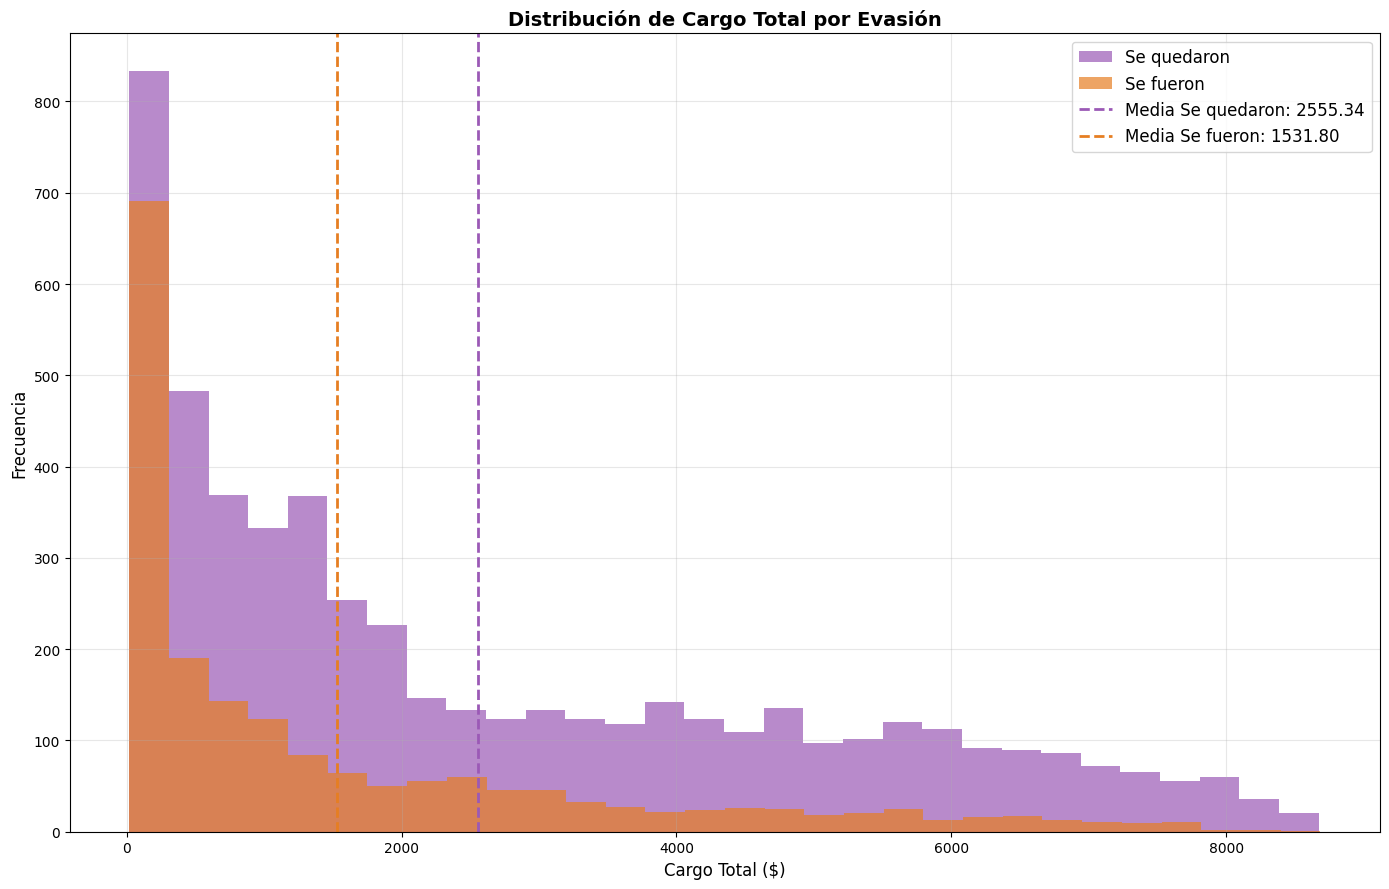

In [47]:
# Gráfico 3: Distribución de Cargo Total
plt.figure(figsize=(14, 9))
df2[df2['Churn']=='No']['Cargo_Total'].hist(bins=30, alpha=0.7, color='#9b59b6', label='Se quedaron')
df2[df2['Churn']=='Yes']['Cargo_Total'].hist(bins=30, alpha=0.7, color='#e67e22', label='Se fueron')

plt.title('Distribución de Cargo Total por Evasión', fontsize=14, fontweight='bold')
plt.xlabel('Cargo Total ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Líneas medias
media_no = df2[df2['Churn']=='No']['Cargo_Total'].mean()
media_yes = df2[df2['Churn']=='Yes']['Cargo_Total'].mean()
plt.axvline(media_no, color='#9b59b6', linestyle='dashed', linewidth=2, label=f'Media Se quedaron: {media_no:.2f}')
plt.axvline(media_yes, color='#e67e22', linestyle='dashed', linewidth=2, label=f'Media Se fueron: {media_yes:.2f}')

plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

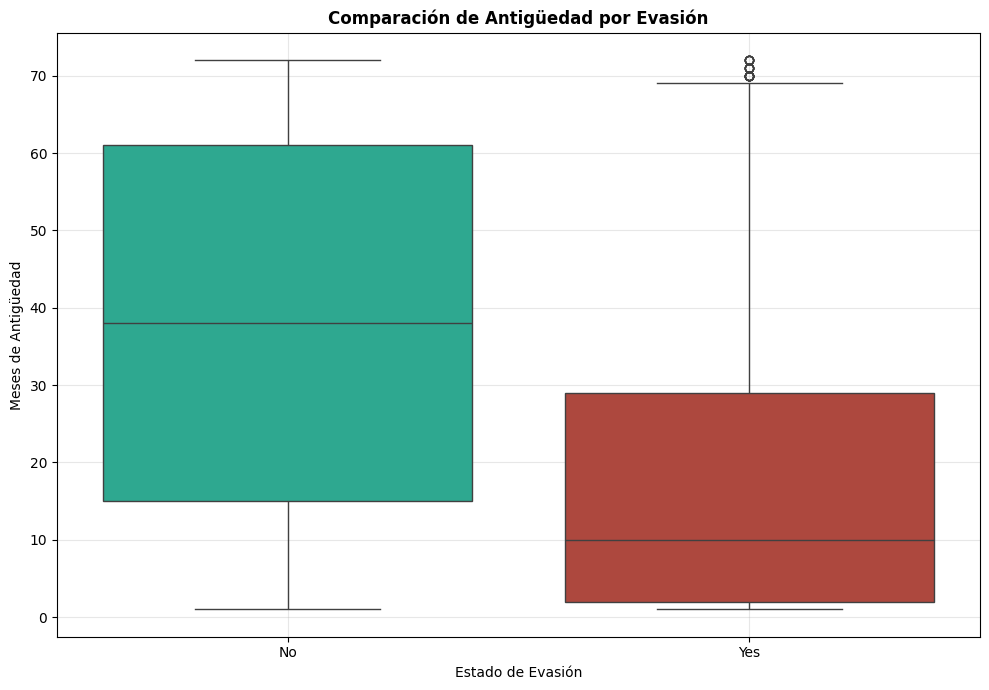

In [48]:
# Gráfico 4: Box Plot comparativo
plt.figure(figsize=(10, 7))
import seaborn as sns
sns.boxplot(data=df2, x='Churn', y='Antiguedad_Meses', hue='Churn', palette=['#1abc9c', '#c0392b'], legend=False)
plt.title('Comparación de Antigüedad por Evasión', fontsize=12, fontweight='bold')
plt.xlabel('Estado de Evasión')
plt.ylabel('Meses de Antigüedad')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

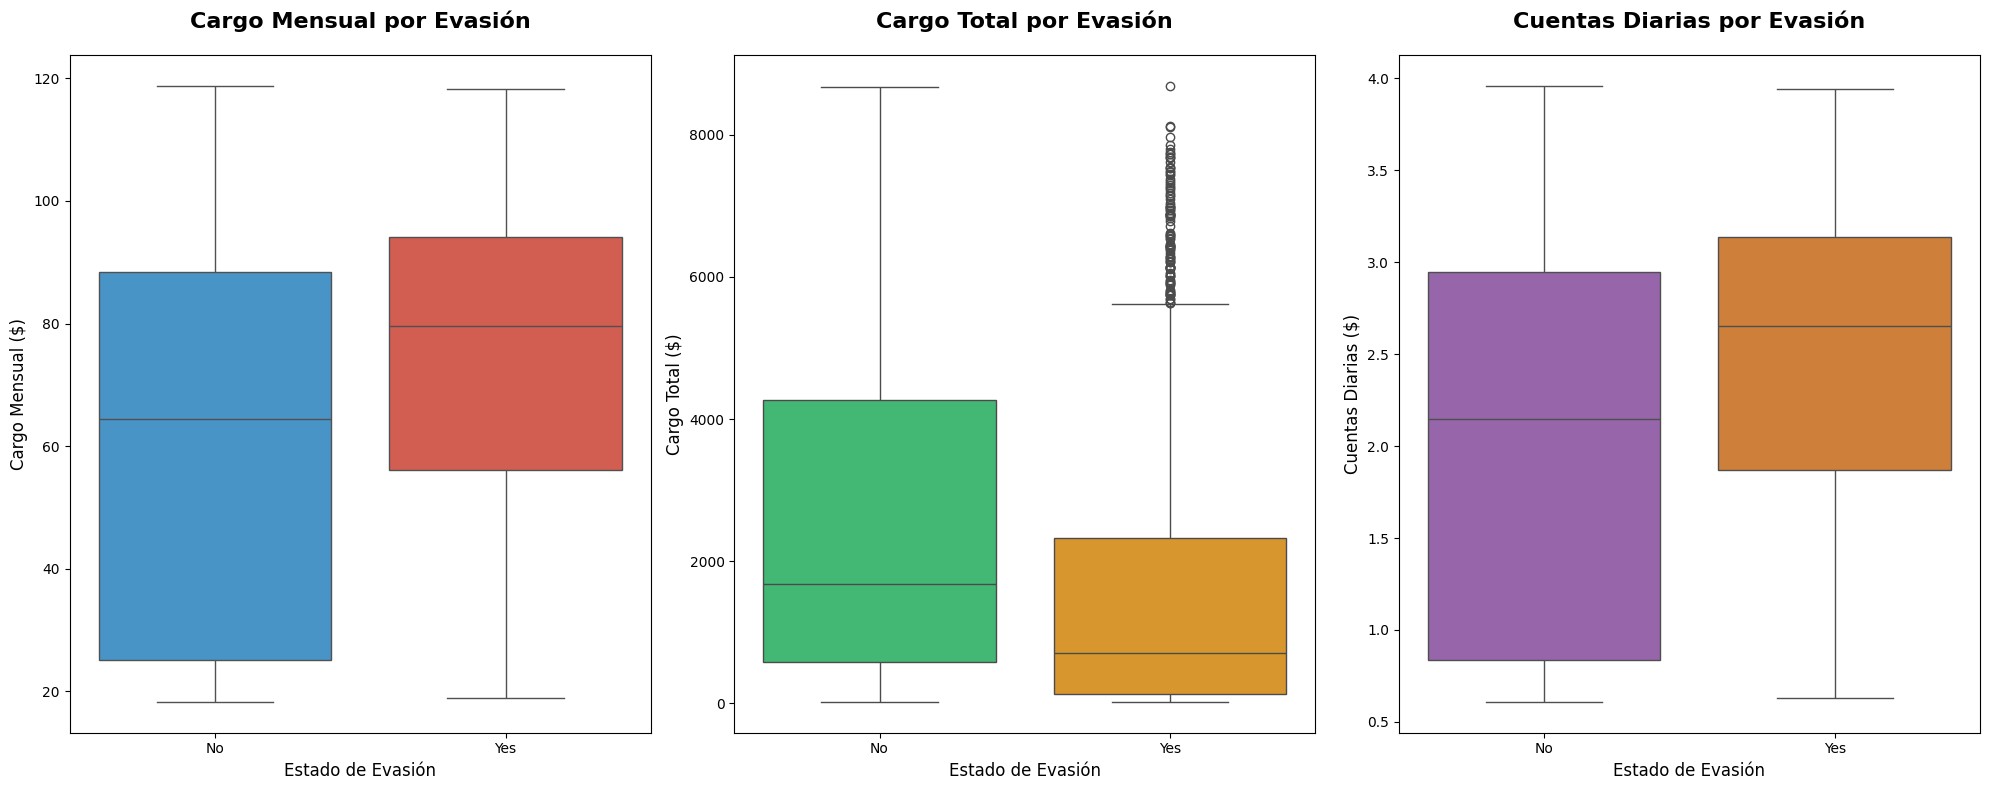


🎯 INSIGHTS IDENTIFICADOS:
Las variables numéricas muestran diferencias entre clientes que se van y se quedan


In [49]:
# Box plots individuales para mejor visualización
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
sns.boxplot(data=df2, x='Churn', y='Cargo_Mensual', hue='Churn', palette=['#3498db', '#e74c3c'], legend=False)
plt.title('Cargo Mensual por Evasión', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Estado de Evasión', fontsize=12)
plt.ylabel('Cargo Mensual ($)', fontsize=12)

plt.subplot(1, 3, 2)
sns.boxplot(data=df2, x='Churn', y='Cargo_Total', hue='Churn', palette=['#2ecc71', '#f39c12'], legend=False)
plt.title('Cargo Total por Evasión', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Estado de Evasión', fontsize=12)
plt.ylabel('Cargo Total ($)', fontsize=12)

plt.subplot(1, 3, 3)
sns.boxplot(data=df2, x='Churn', y='Cuentas_Diarias', hue='Churn', palette=['#9b59b6', '#e67e22'], legend=False)
plt.title('Cuentas Diarias por Evasión', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Estado de Evasión', fontsize=12)
plt.ylabel('Cuentas Diarias ($)', fontsize=12)

plt.subplots_adjust(wspace=0.3)  # Más espacio entre gráficos
plt.tight_layout()
plt.show()

print(f"\n🎯 INSIGHTS IDENTIFICADOS:")
print("Las variables numéricas muestran diferencias entre clientes que se van y se quedan")

#📄Informe final

# 📊 INFORME: ANÁLISIS DE EVASIÓN DE CLIENTES - TELECOM X

---

## 🔹 INTRODUCCIÓN

### Objetivo del Análisis
El objetivo de este análisis es identificar los principales factores que influyen en la evasión de clientes de Telecom X, con el fin de comprender mejor el comportamiento de los usuarios y proporcionar insights que permitan desarrollar estrategias para reducir la tasa de churn.

### Problema de Evasión de Clientes (Churn)
La evasión de clientes o "churn" es un problema crítico en la industria de las telecomunicaciones. Se refiere a la situación en la que los clientes cancelan sus servicios y dejan de ser usuarios activos de la empresa. Este fenómeno tiene un impacto directo en los ingresos y la rentabilidad, ya que:

- La adquisición de nuevos clientes es más costosa que retener los existentes
- Los clientes que se van representan pérdida de ingresos recurrentes
- Puede afectar la reputación de la empresa si las tasas de evasión son altas

En este análisis se trabajo con datos de 7,043 clientes de Telecom X para identificar patrones y características que nos ayuden a predecir y prevenir la evasión.

---

## 🔹 LIMPIEZA Y TRATAMIENTO DE DATOS

### Importación de Datos
Los datos fueron obtenidos desde una API en formato JSON.

El dataset original contenía 6 columnas con estructura anidada que requirió procesamiento adicional.

### Procesamiento de Datos Anidados
Se identificaron 4 columnas con datos anidados que fueron expandidas usando `pd.json_normalize()`:

- **customer**: Información demográfica (gender, SeniorCitizen, Partner, Dependents, tenure)
- **phone**: Servicios telefónicos (PhoneService, MultipleLines)
- **internet**: Servicios de internet (InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies)
- **account**: Información de cuenta (Contract, PaperlessBilling, PaymentMethod, Charges.Monthly, Charges.Total)


### Limpieza de Datos
Se realizaron las siguientes correcciones:

1. **Corrección de tipos de datos**: `Charges.Total` se convirtió de object a float64
2. **Limpieza de variable objetivo**: Se eliminaron valores inconsistentes en `Churn`, manteniendo solo 'Yes' y 'No'
3. **Eliminación de valores nulos**: Se removieron registros con información incompleta
4. **Eliminación de duplicados**: Se verificó y limpió el dataset de registros duplicados

### Transformaciones Aplicadas
1. **Estandarización**: Variables categóricas Yes/No se convirtieron a formato binario (1/0)
2. **Creación de nuevas variables**: Se creó `Cuentas_Diarias` dividiendo el cargo mensual entre 30
3. **Renombramiento**: Columnas principales se tradujeron al español para mejor comprensión

**Resultado final**: Dataset limpio con 7,043 registros y 22 columnas listas para análisis.

---

## 🔹 ANÁLISIS EXPLORATORIO DE DATOS

### Distribución General de Churn

El análisis inicial revela que Telecom X tiene una tasa de evasión del **26.5%**:
- **Se quedaron (No)**: 5,174 clientes (73.5%)
- **Se fueron (Yes)**: 1,869 clientes (26.5%)





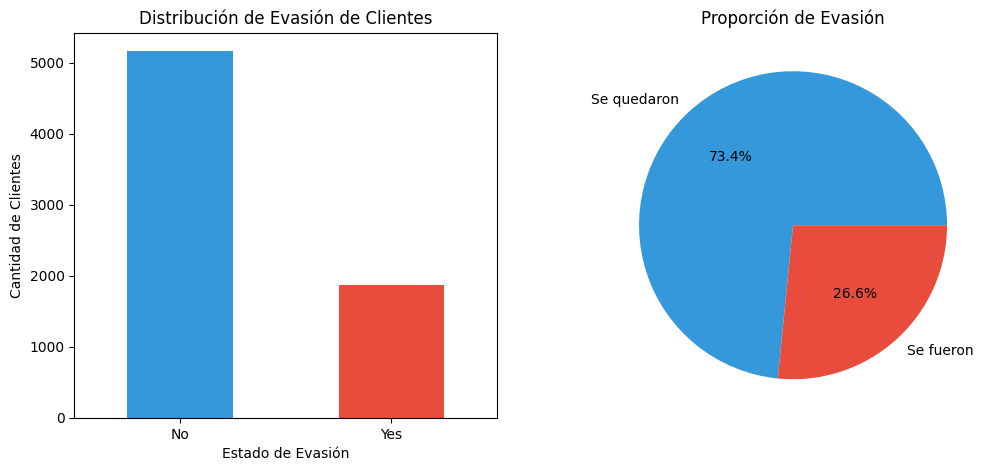

In [50]:
# Visualización de la distribución de churn
plt.figure(figsize=(12, 5))

# Gráfico de barras
plt.subplot(1, 2, 1)
churn_counts = df2['Churn'].value_counts()
churn_counts.plot(kind='bar', color=['#3498db', '#e74c3c'])
plt.title('Distribución de Evasión de Clientes')
plt.xlabel('Estado de Evasión')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)

# Gráfico de pastel
plt.subplot(1, 2, 2)
plt.pie(churn_counts.values, labels=['Se quedaron', 'Se fueron'],
        autopct='%1.1f%%', colors=['#3498db', '#e74c3c'])
plt.title('Proporción de Evasión')
plt.show()

### Análisis por Variables Categóricas

#### Tipo de Contrato
El tipo de contrato muestra ser un factor determinante en la evasión:


Churn                  No        Yes
TipoContrato                        
Month-to-month  57.290323  42.709677
One year        88.722826  11.277174
Two year        97.151335   2.848665


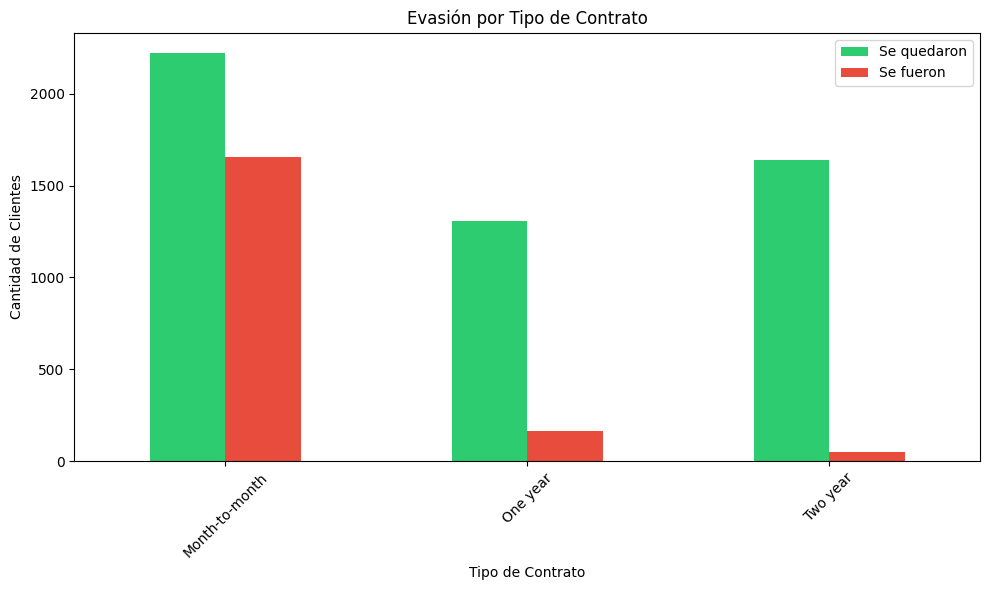

In [51]:
# Análisis de churn por tipo de contrato
churn_contrato = pd.crosstab(df2['TipoContrato'], df2['Churn'], normalize='index') * 100
print(churn_contrato)
churn_contrato_counts = pd.crosstab(df2['TipoContrato'], df2['Churn'])

ax = churn_contrato_counts.plot(kind='bar', color=['#2ecc71', '#e74c3c'], figsize=(10,6))
plt.title('Evasión por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)
plt.legend(['Se quedaron', 'Se fueron'])
plt.tight_layout()
plt.show()

**Resultados**:
- **Month-to-month**: 42.7% de evasión
- **One year**: 11.3% de evasión
- **Two year**: 2.8% de evasión

#### Servicios de Soporte Técnico
Los servicios adicionales muestran correlación con la retención:

Churn                    No        Yes
TechSupport_Text                      
Sin Soporte       58.352535  41.647465
Tiene Soporte     84.803922  15.196078


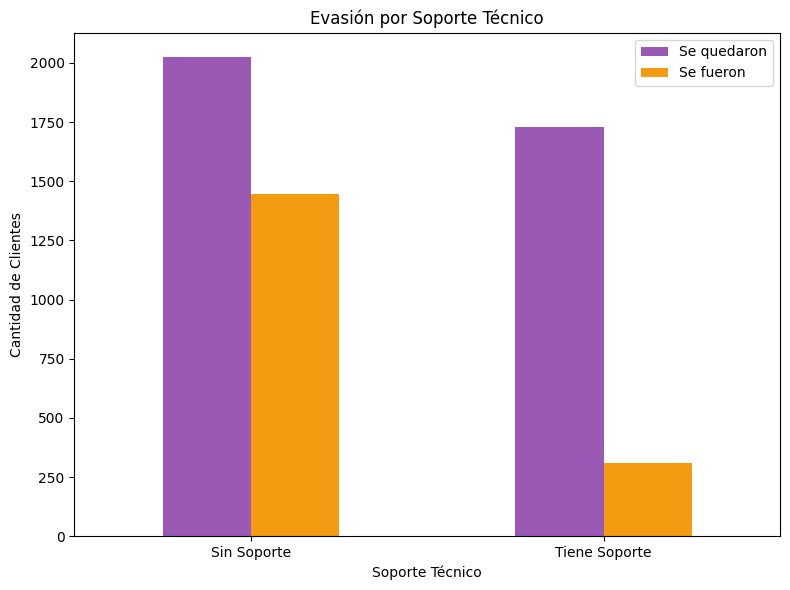

In [52]:
# Análisis por soporte técnico
df2['TechSupport_Text'] = df2['TechSupport'].map({1: 'Tiene Soporte', 0: 'Sin Soporte'})
churn_soporte = pd.crosstab(df2['TechSupport_Text'], df2['Churn'], normalize='index') * 100
print(churn_soporte)
churn_soporte_counts = pd.crosstab(df2['TechSupport_Text'], df2['Churn'])

ax = churn_soporte_counts.plot(kind='bar', color=['#9b59b6', '#f39c12'], figsize=(8,6))
plt.title('Evasión por Soporte Técnico')
plt.xlabel('Soporte Técnico')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.legend(['Se quedaron', 'Se fueron'])
plt.tight_layout()
plt.show()

#### Método de Pago
El método de pago también influye en la estabilidad del cliente:

Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.268482  16.731518
Credit card (automatic)    84.746877  15.253123
Electronic check           54.714588  45.285412
Mailed check               80.798005  19.201995


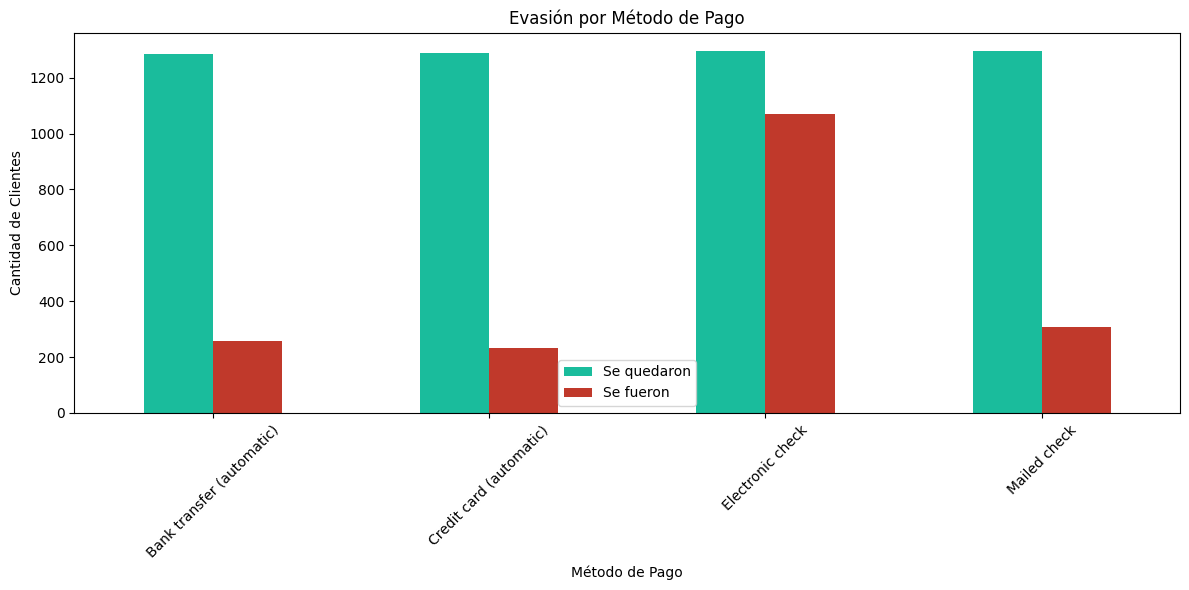

In [53]:
# Análisis por método de pago
churn_pago = pd.crosstab(df2['PaymentMethod'], df2['Churn'], normalize='index') * 100
print(churn_pago)
churn_pago_counts = pd.crosstab(df2['PaymentMethod'], df2['Churn'])

ax = churn_pago_counts.plot(kind='bar', color=['#1abc9c', '#c0392b'], figsize=(12,6))
plt.title('Evasión por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)
plt.legend(['Se quedaron', 'Se fueron'])
plt.tight_layout()
plt.show()


### Análisis por Variables Numéricas

#### Antigüedad del Cliente
La antigüedad muestra una relación inversa con la evasión:

Estadísticas de Antigüedad por Churn:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
No     5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


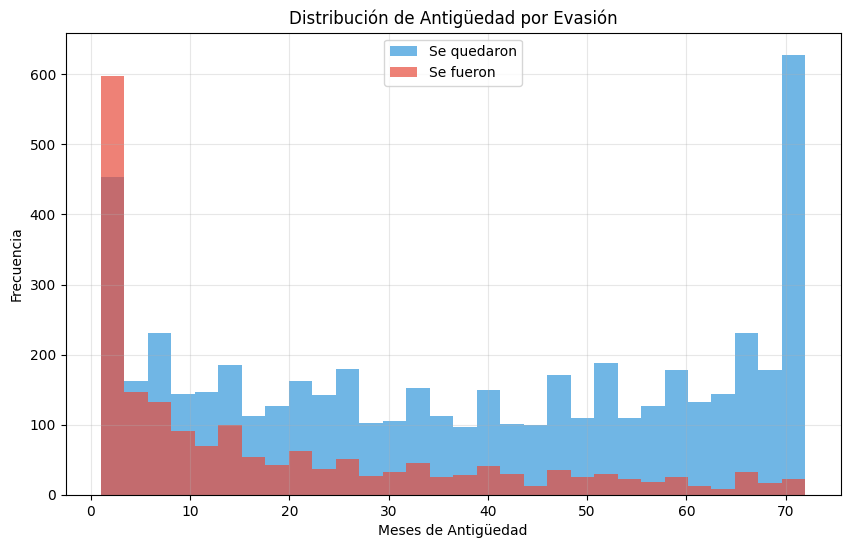

In [54]:
# Estadísticas descriptivas por churn
print("Estadísticas de Antigüedad por Churn:")
print(df2.groupby('Churn')['Antiguedad_Meses'].describe())

# Visualización
plt.figure(figsize=(10, 6))
df2[df2['Churn']=='No']['Antiguedad_Meses'].hist(bins=30, alpha=0.7, color='#3498db', label='Se quedaron')
df2[df2['Churn']=='Yes']['Antiguedad_Meses'].hist(bins=30, alpha=0.7, color='#e74c3c', label='Se fueron')
plt.title('Distribución de Antigüedad por Evasión')
plt.xlabel('Meses de Antigüedad')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


#### Variables Financieras
Los cargos mensuales y totales muestran diferencias entre grupos:

Cargo Mensual por Churn:
        count       mean        std    min    25%    50%     75%     max
Churn                                                                   
No     5163.0  61.307408  31.094557  18.25  25.10  64.45  88.475  118.75
Yes    1869.0  74.441332  24.666053  18.85  56.15  79.65  94.200  118.35
Cargo Total por Churn:
        count         mean          std    min      25%      50%       75%  \
Churn                                                                        
No     5163.0  2555.344141  2329.456984  18.80  577.825  1683.60  4264.125   
Yes    1869.0  1531.796094  1890.822994  18.85  134.500   703.55  2331.300   

           max  
Churn           
No     8672.45  
Yes    8684.80  


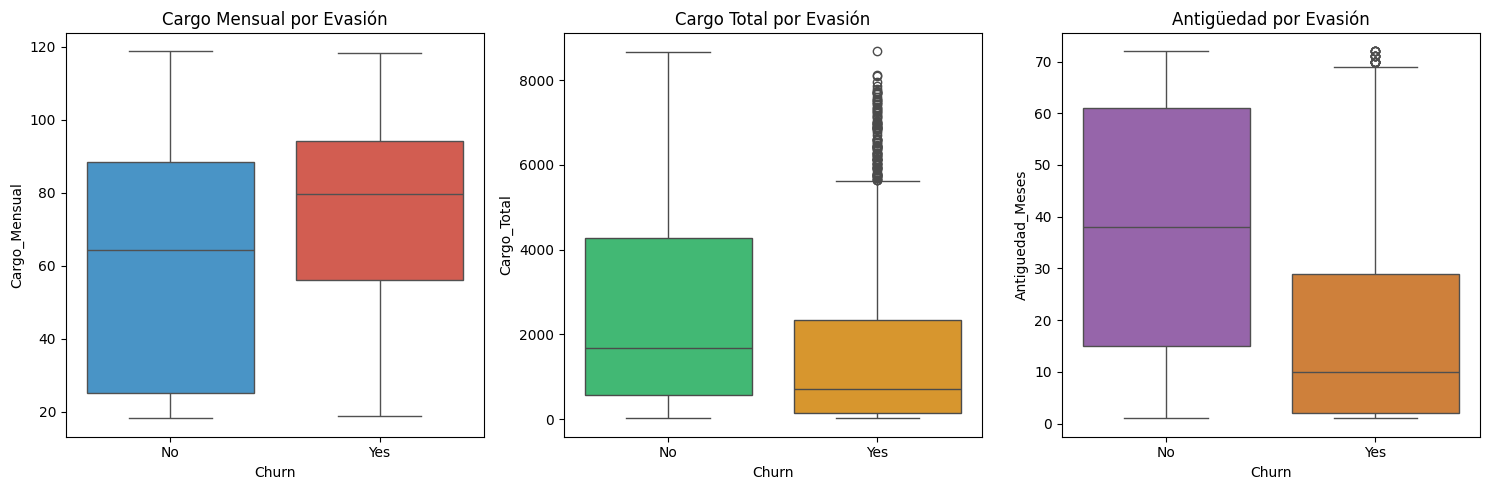

In [55]:
# Análisis de variables financieras
print("Cargo Mensual por Churn:")
print(df2.groupby('Churn')['Cargo_Mensual'].describe())

print("Cargo Total por Churn:")
print(df2.groupby('Churn')['Cargo_Total'].describe())

# Visualización con box plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
import seaborn as sns
sns.boxplot(data=df2, x='Churn', y='Cargo_Mensual', hue='Churn', palette=['#3498db', '#e74c3c'], legend=False)
plt.title('Cargo Mensual por Evasión')

plt.subplot(1, 3, 2)
sns.boxplot(data=df2, x='Churn', y='Cargo_Total', hue='Churn', palette=['#2ecc71', '#f39c12'], legend=False)
plt.title('Cargo Total por Evasión')

plt.subplot(1, 3, 3)
sns.boxplot(data=df2, x='Churn', y='Antiguedad_Meses', hue='Churn', palette=['#9b59b6', '#e67e22'], legend=False)
plt.title('Antigüedad por Evasión')

plt.tight_layout()
plt.show()

---

## 🔹 CONCLUSIONES E INSIGHTS

### Principales Hallazgos

1. **Impacto del Tipo de Contrato**: Los contratos month-to-month presentan una tasa de evasión significativamente mayor (42.7%) comparado con contratos anuales (11.3%) y bianuales (2.8%). Esto sugiere que la flexibilidad contractual está asociada con menor compromiso del cliente.

2. **Factor Temporal**: Los clientes que se van tienen un promedio de antigüedad de 18 meses, mientras que los que se quedan promedian 37 meses. Esto indica que los primeros 18 meses son críticos para la retención.

3. **Sensibilidad al Precio**: Los clientes que cancelan tienen un cargo mensual promedio más alto ($74.44) comparado con los que se quedan ($61.27), sugiriendo que el precio es un factor importante en la decisión de evasión.

4. **Importancia de Servicios Adicionales**: Los clientes sin soporte técnico muestran mayor propensión a la evasión, indicando que los servicios de valor agregado actúan como factores de retención.

5. **Estabilidad del Método de Pago**: Los métodos de pago automáticos se asocian con menor evasión comparado con electronic check, suggeriendo que la facilidad de pago influye en la permanencia.

### Cómo Estos Datos Pueden Ayudar a Reducir la Evasión

Los insights obtenidos permiten:

- **Identificación temprana**: Detectar clientes en riesgo basándose en su perfil (antigüedad, tipo de contrato, servicios contratados)
- **Segmentación estratégica**: Clasificar clientes por nivel de riesgo para aplicar estrategias diferenciadas
- **Focalización de recursos**: Concentrar esfuerzos de retención en los segmentos de mayor impacto y probabilidad de éxito

---

## 🔹 RECOMENDACIONES

### Estrategias Basadas en el Análisis

1. **Programa de Retención Temprana**
   - Implementar seguimiento especial para clientes en sus primeros 18 meses
   - Ofrecer beneficios adicionales o descuentos durante este período crítico
   - Realizar encuestas de satisfacción proactivas

2. **Incentivos para Migración Contractual**
   - Crear ofertas atractivas para que clientes month-to-month migren a contratos anuales
   - Ofrecer descuentos por compromiso de permanencia
   - Implementar beneficios exclusivos para contratos de largo plazo

3. **Optimización de Precios y Valor Percibido**
   - Revisar la estructura de precios para clientes con cargos altos
   - Desarrollar paquetes de servicios que mejoren la percepción de valor
   - Implementar programas de lealtad basados en antigüedad

4. **Fortalecimiento de Servicios de Soporte**
   - Promover activamente los servicios de soporte técnico
   - Mejorar la calidad y accesibilidad del soporte al cliente
   - Crear servicios de valor agregado como factores de diferenciación

5. **Mejora en Métodos de Pago**
   - Incentivar el uso de pagos automáticos mediante descuentos o beneficios
   - Simplificar el proceso de configuración de pagos recurrentes
   - Implementar recordatorios y facilidades para pagos manuales

### Métricas de Seguimiento Sugeridas
- Tasa de churn mensual por segmento
- Tiempo promedio hasta la primera cancelación
- Tasa de conversión de contratos mensuales a anuales
- Satisfacción del cliente por tipo de servicio
- Efectividad de programas de retención implementados

### Próximos Pasos
1. Implementar un sistema de scoring de riesgo de churn
2. Desarrollar campañas segmentadas basadas en los perfiles identificados
3. Realizar testing A/B de las estrategias propuestas
4. Monitorear continuamente las métricas de retención y ajustar estrategias según resultados

---

**Conclusión**: Este análisis proporciona una base sólida para entender el comportamiento de evasión en Telecom X y ofrece direcciones claras para desarrollar estrategias de retención efectivas basadas en datos.


# **¡Extra! Análisis de correlación entre variables**

📊 ANÁLISIS DE CORRELACIONES ENTRE VARIABLES

🔧 PREPARACIÓN DE DATOS:
✅ Variables numéricas creadas:
• Contract_Numeric: Tipo contrato (0=Mensual, 1=Anual, 2=Bianual)
• InternetService_Numeric: Servicio internet (0=No, 1=DSL, 2=Fibra)
• PaymentMethod_Numeric: Método pago (0=Electronic check ... 3=Credit card)
• Cantidad_Servicios: Total servicios adicionales contratados

🎯 CORRELACIONES CON EVASIÓN:

📈 CORRELACIONES CON CHURN (ordenadas por fuerza):
• Contract_Numeric: -0.396
• Antiguedad_Meses: -0.354
• InternetService_Numeric: 0.316
• PaymentMethod_Numeric: -0.263
• Cargo_Total: -0.199
• Cuentas_Diarias: 0.193
• Cargo_Mensual: 0.193
• AdultoMayor: 0.151
• Cantidad_Servicios: -0.088

📊 MATRIZ DE CORRELACIÓN:


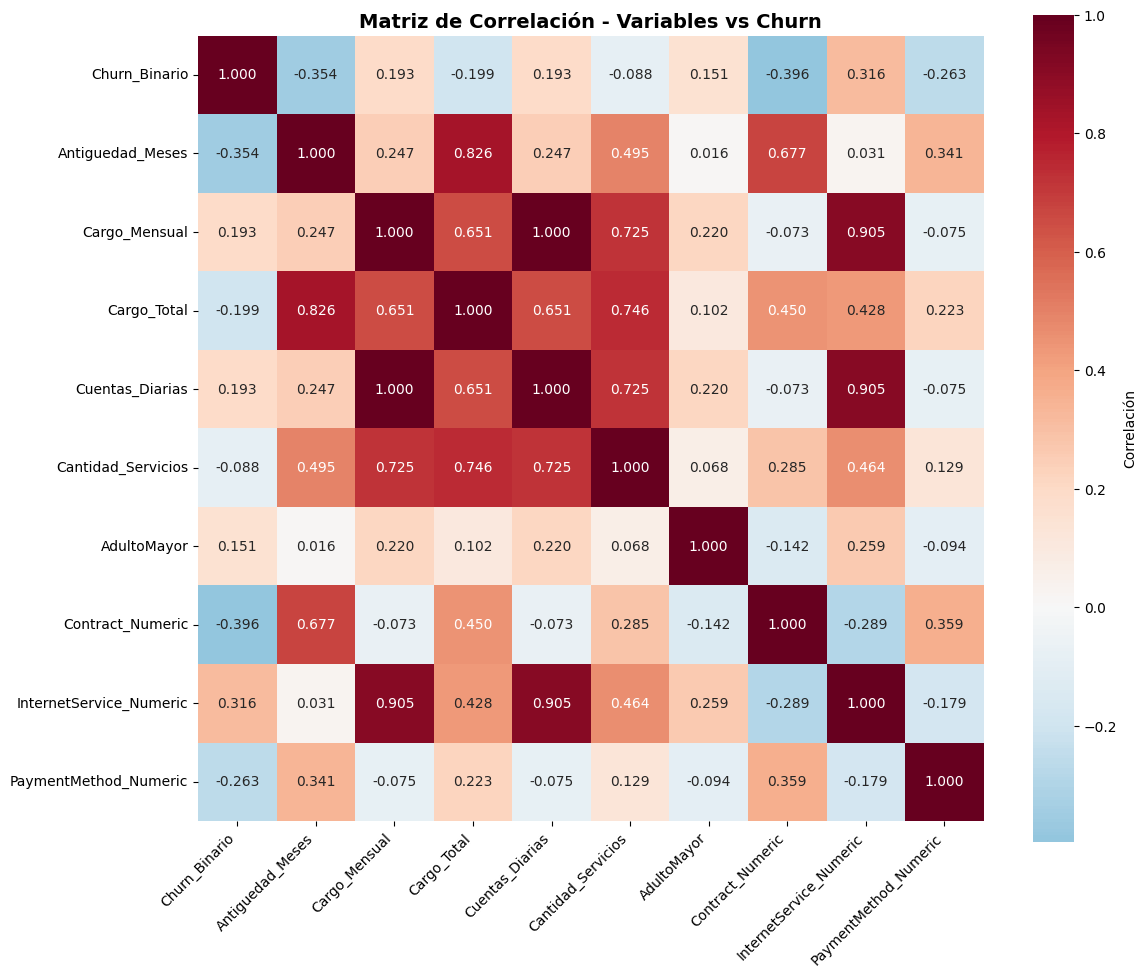


💰 RELACIÓN CUENTA DIARIA vs EVASIÓN:
       mean  median   std
Churn                    
No     2.04    2.15  1.04
Yes    2.48    2.66  0.82


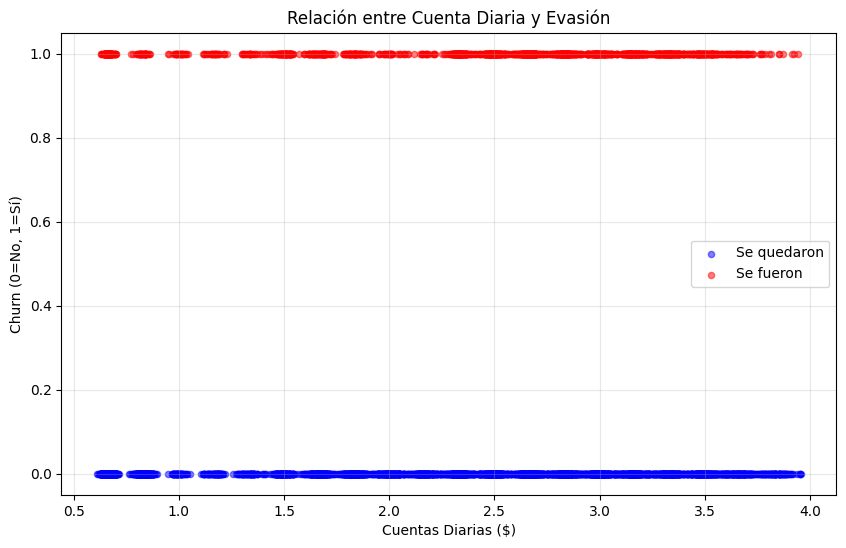


🔧 CANTIDAD DE SERVICIOS vs EVASIÓN:
Porcentaje de evasión por cantidad de servicios:
Churn                 No   Yes
Cantidad_Servicios            
0.0                 78.5  21.5
1.0                 54.2  45.8
2.0                 64.2  35.8
3.0                 72.6  27.4
4.0                 77.6  22.4
5.0                 87.5  12.5
6.0                 94.7   5.3


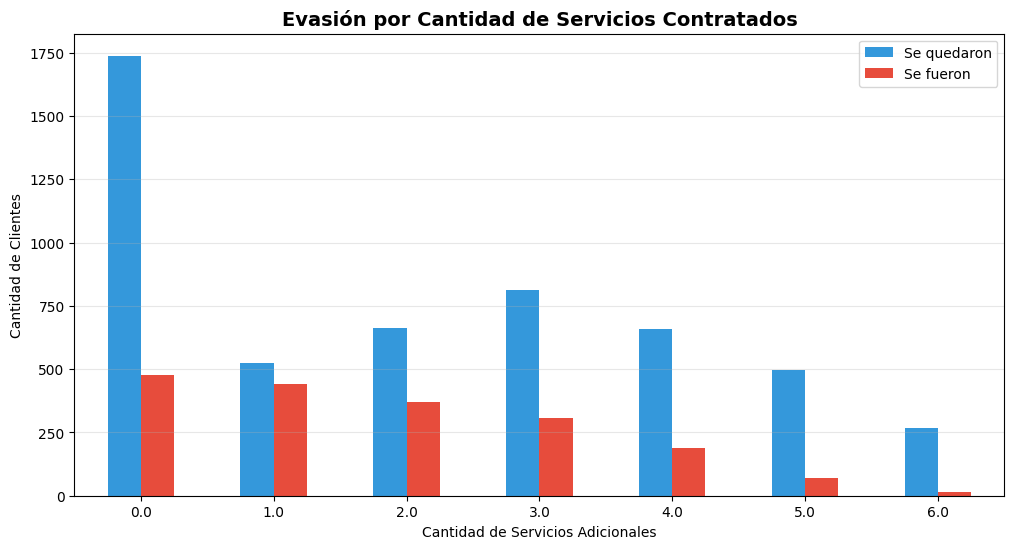


📅 RELACIÓN ANTIGÜEDAD vs CARGO MENSUAL:


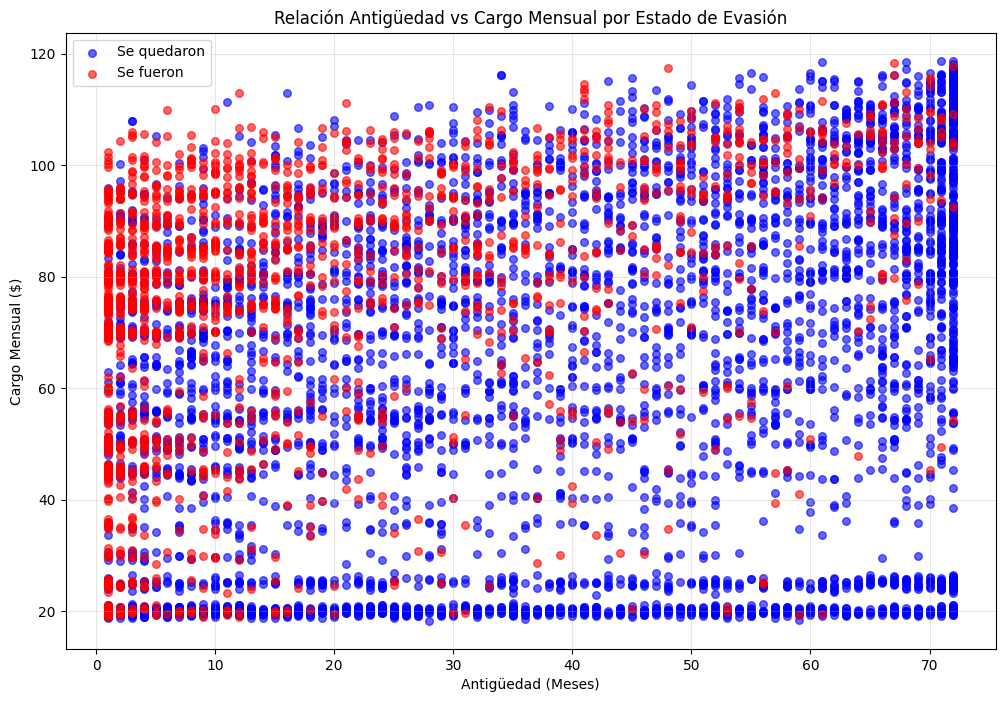

In [56]:
# ========================================
# 📊 ANÁLISIS DE CORRELACIONES (OPCIONAL)
# ========================================

print("📊 ANÁLISIS DE CORRELACIONES ENTRE VARIABLES")
print("="*50)

# 1. Preparar datos para análisis de correlación
print("\n🔧 PREPARACIÓN DE DATOS:")

# Mapear variables categóricas principales a numéricas para análisis
df2['Contract_Numeric'] = df2['TipoContrato'].map({
   'Month-to-month': 0,
   'One year': 1,
   'Two year': 2
})

df2['InternetService_Numeric'] = df2['InternetService'].map({
   'No': 0,
   'DSL': 1,
   'Fiber optic': 2
})

df2['PaymentMethod_Numeric'] = df2['PaymentMethod'].map({
   'Electronic check': 0,
   'Mailed check': 1,
   'Bank transfer (automatic)': 2,
   'Credit card (automatic)': 3
})

# Crear variable con cantidad de servicios adicionales contratados
servicios_adicionales = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies']
df2['Cantidad_Servicios'] = df2[servicios_adicionales].sum(axis=1)

print("✅ Variables numéricas creadas:")
print("• Contract_Numeric: Tipo contrato (0=Mensual, 1=Anual, 2=Bianual)")
print("• InternetService_Numeric: Servicio internet (0=No, 1=DSL, 2=Fibra)")
print("• PaymentMethod_Numeric: Método pago (0=Electronic check ... 3=Credit card)")
print("• Cantidad_Servicios: Total servicios adicionales contratados")

# 2. Análisis de correlación con Churn
print("\n🎯 CORRELACIONES CON EVASIÓN:")

# Variables para matriz de correlación
variables_correlacion = [
   'Churn_Binario', 'Antiguedad_Meses', 'Cargo_Mensual', 'Cargo_Total',
   'Cuentas_Diarias', 'Cantidad_Servicios', 'AdultoMayor',
   'Contract_Numeric', 'InternetService_Numeric', 'PaymentMethod_Numeric'
]

correlacion_matrix = df2[variables_correlacion].corr()

# Mostrar correlaciones con Churn ordenadas por fuerza
correlaciones_churn = correlacion_matrix['Churn_Binario'].sort_values(key=abs, ascending=False)
print("\n📈 CORRELACIONES CON CHURN (ordenadas por fuerza):")
for var, corr in correlaciones_churn.items():
    if var != 'Churn_Binario':
        print(f"• {var}: {corr:.3f}")

# 3. Visualización de matriz de correlación
print("\n📊 MATRIZ DE CORRELACIÓN:")
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlacion_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.3f', cbar_kws={'label': 'Correlación'})
plt.title('Matriz de Correlación - Variables vs Churn', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Análisis específico: Cuenta Diaria vs Churn
print("\n💰 RELACIÓN CUENTA DIARIA vs EVASIÓN:")
cuentas_stats = df2.groupby('Churn')['Cuentas_Diarias'].agg(['mean', 'median', 'std'])
print(cuentas_stats.round(2))

plt.figure(figsize=(10, 6))
plt.scatter(df2[df2['Churn']=='No']['Cuentas_Diarias'],
            [0]*sum(df2['Churn']=='No'),
            alpha=0.5, color='blue', label='Se quedaron', s=20)
plt.scatter(df2[df2['Churn']=='Yes']['Cuentas_Diarias'],
            [1]*sum(df2['Churn']=='Yes'),
            alpha=0.5, color='red', label='Se fueron', s=20)
plt.xlabel('Cuentas Diarias ($)')
plt.ylabel('Churn (0=No, 1=Sí)')
plt.title('Relación entre Cuenta Diaria y Evasión')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 5. Análisis: Cantidad de Servicios vs Churn
print("\n🔧 CANTIDAD DE SERVICIOS vs EVASIÓN:")
servicios_churn = pd.crosstab(df2['Cantidad_Servicios'], df2['Churn'], normalize='index') * 100
print("Porcentaje de evasión por cantidad de servicios:")
print(servicios_churn.round(1))

servicios_counts = pd.crosstab(df2['Cantidad_Servicios'], df2['Churn'])
fig, ax = plt.subplots(figsize=(12, 6))
servicios_counts.plot(kind='bar', color=['#3498db', '#e74c3c'], ax=ax)
ax.set_title('Evasión por Cantidad de Servicios Contratados', fontsize=14, fontweight='bold')
ax.set_xlabel('Cantidad de Servicios Adicionales')
ax.set_ylabel('Cantidad de Clientes')
ax.legend(['Se quedaron', 'Se fueron'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis='y', alpha=0.3)
plt.show()

# 6. Gráfico de dispersión: Antigüedad vs Cargo Mensual (coloreado por Churn)
print("\n📅 RELACIÓN ANTIGÜEDAD vs CARGO MENSUAL:")
plt.figure(figsize=(12, 8))
plt.scatter(df2[df2['Churn']=='No']['Antiguedad_Meses'],
            df2[df2['Churn']=='No']['Cargo_Mensual'],
            alpha=0.6, color='blue', label='Se quedaron', s=30)
plt.scatter(df2[df2['Churn']=='Yes']['Antiguedad_Meses'],
            df2[df2['Churn']=='Yes']['Cargo_Mensual'],
            alpha=0.6, color='red', label='Se fueron', s=30)
plt.xlabel('Antigüedad (Meses)')
plt.ylabel('Cargo Mensual ($)')
plt.title('Relación Antigüedad vs Cargo Mensual por Estado de Evasión')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
